In [70]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.autograd.profiler as profiler
from scipy.constants import *
import time

from simulator import *
from utils import *
from physics import *

device = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(2304)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:

Lx, Ly = 1.0, 1.0
Nx, Ny = 32, 32
dt = 1e-5
simulation_time = 1e-2
normalization = 1.0

backend = "cpu"

sim = Space(
    Lx=Lx,
    Ly=Ly,
    Nx=Nx,
    Ny=Ny,
    simulation_time=simulation_time,
    dt=dt,
    normalization=normalization,
    boundaries_type="reflecting",
    save_frequency=10,
    backend= backend,
)

sim.poisson_method = "gauss_seidel"

# Creiamo una particella con carica q=1, massa m=1
sim.create_new_specie(
    name="test_particle",
    num_particles=1,
    distribution="zero",
    disposition="specific",
    position=[0.5, 0.5],
    mass=1.0,
    charge=1.0
)

E0 = 1000
linear_potential = torch.zeros((Nx, Ny))
for j in range(Ny):
    linear_potential[j, :] = torch.linspace(0, E0, Nx)
    
sim.add_rectangle_object(0, Lx, 0, Ly, solid = False, potential= linear_potential)

steps = sim.steps
with torch.no_grad():
    for step in tqdm(range(steps), unit=" step", leave=True):
        sim.update()

# Ora controlliamo la velocità finale della particella.

v_final = sim.particles_velocity[0]
print("Velocità finale della particella:", v_final.cpu().numpy())

100%|██████████| 999/999 [00:01<00:00, 502.96 step/s]

Velocità finale della particella: [  0.       -10.312249   0.      ]


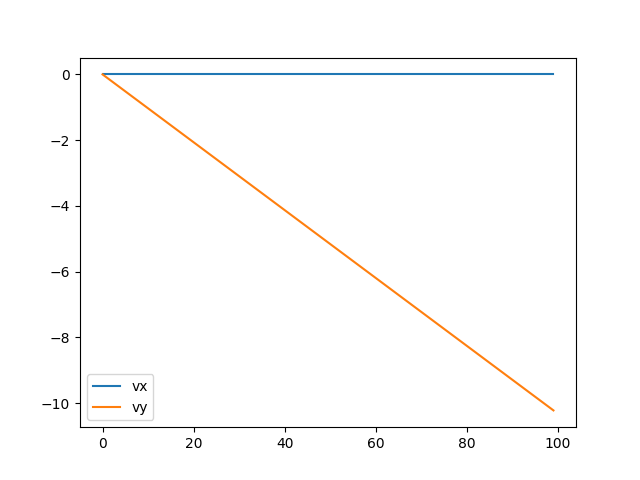

In [73]:
plt.figure()
velocities = np.array(sim.particles_velocity_chronology[:])
vx = velocities[:, 0, 0] 
vy = velocities[:, 0, 1] 
plt.plot(vx)
plt.plot(vy)
plt.legend(["vx", "vy"])
plt.show()

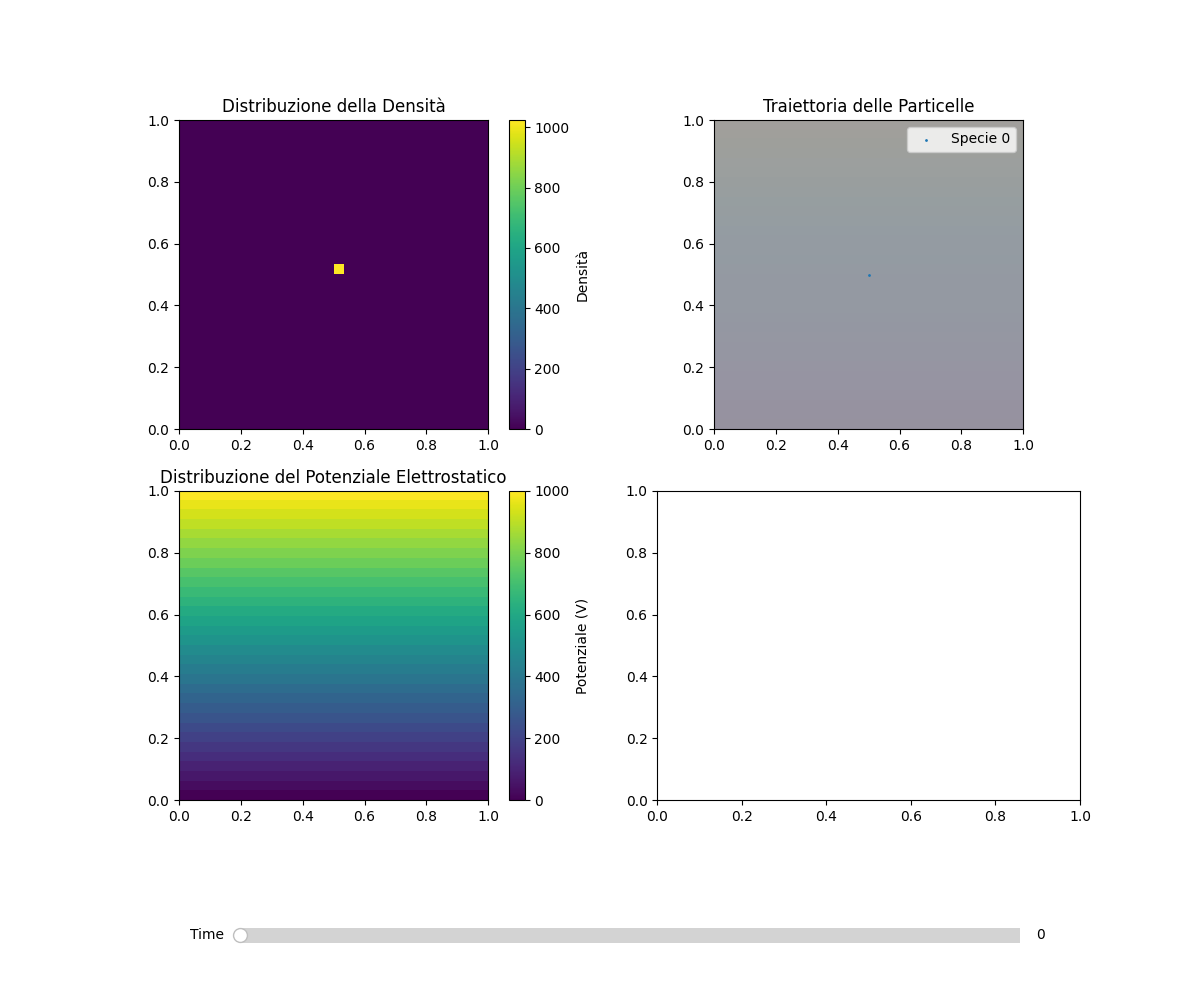

AttributeError: 'Canvas' object has no attribute 'key_press_event'

AttributeError: 'Canvas' object has no attribute 'key_press_event'

AttributeError: 'Canvas' object has no attribute 'key_release_event'

AttributeError: 'Canvas' object has no attribute 'key_release_event'

In [74]:
%matplotlib widget
particles_position_chronology = sim.particles_position_chronology
particles_velocity_chronology = sim.particles_velocity_chronology
fields_chronology = sim.fields_chronology
grid_chronology = sim.grid_chronology
particles_specie_chronology = sim.particles_specie_chronology
kinetic_energy_chronology = sim.kinetic_energy_chronology
potential_energy_chronology = sim.potential_energy_chronology
mechanic_energy_chronology = sim.mechanic_energy_chronology
particles_position_chronology = torch.stack(particles_position_chronology).cpu().numpy()
particles_velocity_chronology = torch.stack(particles_velocity_chronology).cpu().numpy()
fields_chronology = torch.stack(fields_chronology).cpu().numpy()
grid_chronology = torch.stack(grid_chronology).cpu().numpy()
particles_specie_chronology = torch.stack(particles_specie_chronology).cpu().numpy()
kinetic_energy_chronology = np.array(kinetic_energy_chronology)
potential_energy_chronology = np.array(potential_energy_chronology)
mechanic_energy_chronology = np.array(mechanic_energy_chronology)



dynamic_slider(fields_chronology, grid_chronology, particles_position_chronology, particles_specie_chronology, Lx, Ly, sim.solid_mask.cpu().numpy(), sim.fixed_potential_value.cpu().numpy())

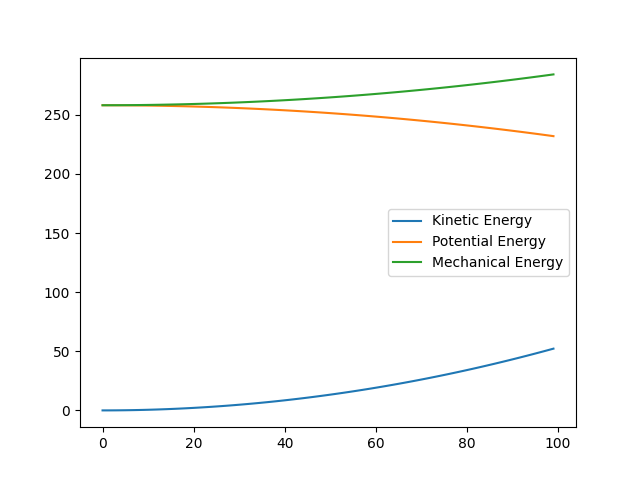

In [69]:
plt.close()
plt.figure()
plt.plot(sim.kinetic_energy_chronology, label="Kinetic Energy")
plt.plot(sim.potential_energy_chronology, label="Potential Energy")
plt.plot(sim.mechanic_energy_chronology, label="Mechanical Energy")
plt.legend()
plt.show()